In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from math import sqrt
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Generate Descriptive Statistics and Visualizations

**For the "Median value of owner-occupied homes" provide a boxplot**


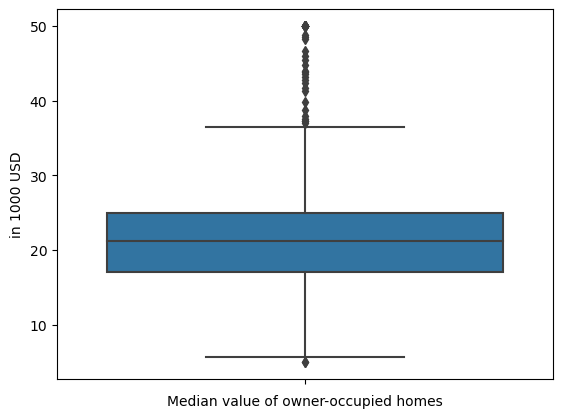

In [7]:
ax = sns.boxplot(y='MEDV',data = boston_df )
plt.xlabel('Median value of owner-occupied homes')
plt.ylabel('in 1000 USD')
plt.show()

- Median value is just above 20 (21 or 22)
- Minimum is below 10 (like 6-7)
- Maximum value is about 50
- Looks like skewed Dataset

  **Provide a  bar plot for the Charles river variable**
  

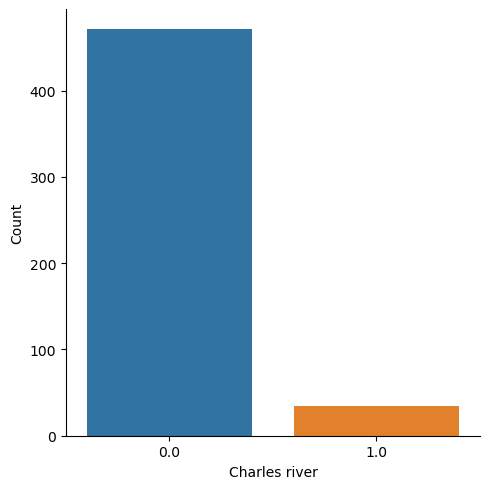

In [52]:
ax = sns.catplot(x = 'CHAS',kind = 'count',data = boston_df)
plt.xlabel('Charles river')
plt.ylabel('Count')
plt.show()

There are few houses near Charles river

**Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)**

In [26]:
boston_df.loc[boston_df['AGE'] < 35, 'Age Group'] = 'Young'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age Group'] = 'Middle'
boston_df.loc[boston_df['AGE'] > 70, 'Age Group'] = 'Old'

In [48]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age Group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Middle
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,Old
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Middle
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Middle
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Middle


Text(0, 0.5, 'Median value of owner-occupied homes in 1000USDs')

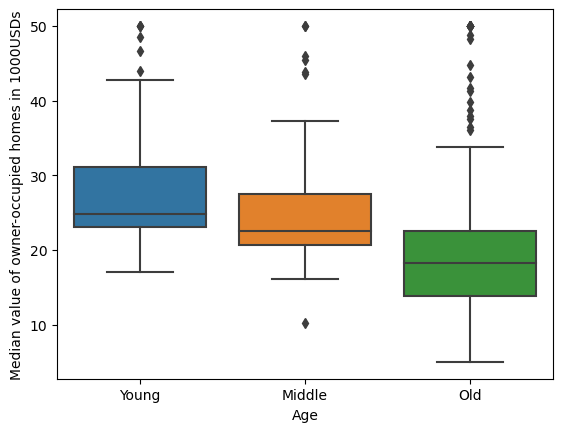

In [30]:
ax = sns.boxplot(x='Age Group', y='MEDV', order= ['Young','Middle','Old'], data=boston_df)
plt.xlabel('Age')
plt.ylabel('Median value of owner-occupied homes in 1000USDs')


 Median value of owner-occupied homes in $1000's is decreseing when gouse units become old



**Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?**


Text(9.444444444444445, 0.5, 'Nitric oxide concentration')

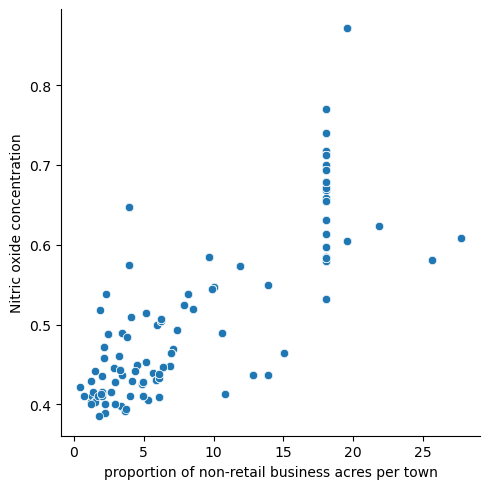

In [32]:
ax = sns.relplot(x = 'INDUS',y='NOX',data = boston_df)
plt.xlabel('proportion of non-retail business acres per town')
plt.ylabel('Nitric oxide concentration')

 Nitric oxide concentrations increse when the proportion of non-retail business acres per town increases

**Create a histogram for the pupil to teacher ratio variable**

Text(0.5, 0, 'Pupil-Teacher ratio')

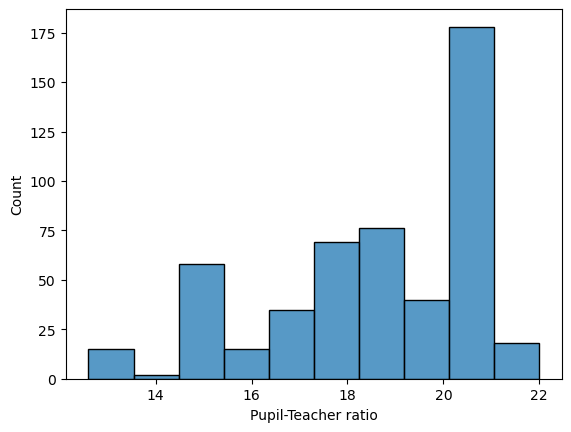

In [51]:
ax = sns.histplot(x= 'PTRATIO' ,data = boston_df,bins = 10)
plt.xlabel('Pupil-Teacher ratio')

## Hypothesis Testing and Regression Analysis

**Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

Null Hypothesis: There is no significant difference in meadian value of houses bounded by the Charles river or not

Alternative Hypothesis: There is a significant difference in meadian value of houses bounded by the Charles river or not

α = 0.05

In [35]:
#testing varience to be equal or not
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [36]:
#ttest
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**Conclusion** : P value smaller than α. Therefore null hypothesis is rejected as there is enough proof that there is a statistical difference in meadian value of houses bounded by the Charles river or not

**Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

Null hypothesis: There is no significance difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940
Alternative hypothesis: There is a significance difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940


In [38]:
#testing varience to be equal or not
scipy.stats.levene(boston_df[boston_df['Age Group'] == 'Young']['MEDV'],
                   boston_df[boston_df['Age Group'] == 'Middle']['MEDV'],
                   boston_df[boston_df['Age Group'] == 'Old']['MEDV'], center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [41]:
young_house = boston_df[boston_df['Age Group'] == 'Young']['MEDV']
middle_house = boston_df[boston_df['Age Group'] == 'Middle']['MEDV']
old_house = boston_df[boston_df['Age Group'] == 'Old']['MEDV']

In [42]:
f_statistic, p_value = scipy.stats.f_oneway(young_house, middle_house, old_house)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))


F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Colclusion** : P-value is less than 0.05. Therefore, there is enough evidence to reject null hypothesis. There is enough statistical evidence to say there is a significance difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940


**Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**



Null Hypothesis: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

Alternative Hypothesis:  there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [45]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])


PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

**Conclusion** : P value is lower than 0.05. So, null hypothesis is rejected. we can't conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

**What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

Null Hypothesis: Additional weighted distance to the five Boston employment centres have no impact on the median value of owner occupied homes.

Alternative Hypotheis: Additional weighted distance to the five Boston employment centres have a impact on the median value of owner occupied homes
    

In [47]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           1.21e-08
Time:                        15:13:12   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion**: P-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a relationship between weighted distance to the five Boston employment  and median value of owner occupied homes. The coefficient 18.3901 means that median value of owner occupied homes change 18.3901 units when weighted distance to the five Boston employment change in 1 unit.